In [1]:
# Importing necessary libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing tools for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 1: Load the dataset
data = pd.read_csv("advertising.csv")

# Let's take a quick look at the data
print(data.head())

# Checking for any missing values
print(data.isnull().sum())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


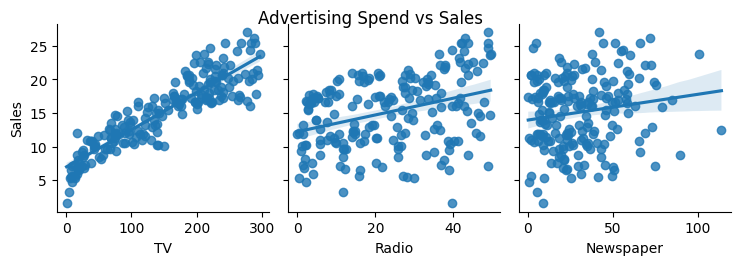

In [3]:
# Step 2: Visualizing the relationships between ad spends and sales
# This helps in understanding which features might be useful
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.show()


In [4]:
# Step 3: Separating features and target
# X contains the ad spend columns; y is the sales column we want to predict
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [5]:
# Step 4: Splitting the data into training and testing sets
# 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [6]:
# Step 5: Creating the Linear Regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Step 6: Making predictions on the test data
y_pred = model.predict(X_test)


In [8]:
# Step 7: Evaluating the model's performance
# Mean Squared Error shows how far off the predictions are
# R2 score tells us how well the model explains the data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2.409333612892369
R2 Score: 0.8747226291661847


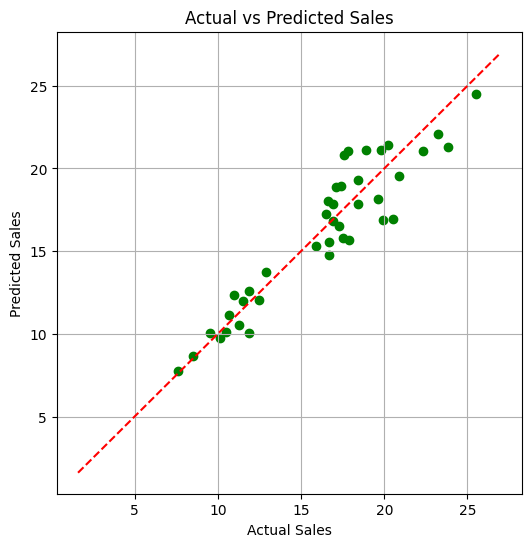

In [9]:
# Step 8: Visualizing actual vs predicted sales
# This helps us see how close the predictions were to the real values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line for perfect predictions
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
